# Question 2

## Part (a)

In [1]:
import pandas as pd

d = {'Country':['B', 'C', 'D', 'E', 'F', 'G', 'H'], 'Q':[80, 150, 135, 165, 95, 130, 110], 'L':[60, 100, 100, 120, 70, 90, 80], 'K':[50,100,80,100,60,80,70]}
df = pd.DataFrame(data=d)
df

,Country,Q,L,K
0,B,80,60,50
1,C,150,100,100
2,D,135,100,80
3,E,165,120,100
4,F,95,70,60
5,G,130,90,80
6,H,110,80,70


In [2]:
print("Mean:")
df.mean()

Mean:


Q    123.571429
L     88.571429
K     77.142857
dtype: float64

In [10]:
print("Variance:")
df.var()

Q    914.285714
L    414.285714
K    357.142857
dtype: float64

In [12]:
print("Standard Deviation:")
df.std()

Q    30.237158
L    20.354010
K    18.898224
dtype: float64

In [13]:
print("Median:")
df.median()

Q    130.0
L     90.0
K     80.0
dtype: float64

# Part (b)

(array([1., 1., 0., 1., 0., 1., 1., 0., 1., 1.]),
 array([ 80. ,  88.5,  97. , 105.5, 114. , 122.5, 131. , 139.5, 148. ,
        156.5, 165. ]),
 <a list of 10 Patch objects>)

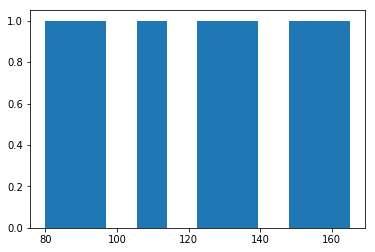

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(df['Q'])

(array([1., 1., 0., 1., 0., 1., 2., 0., 0., 1.]),
 array([ 60.,  66.,  72.,  78.,  84.,  90.,  96., 102., 108., 114., 120.]),
 <a list of 10 Patch objects>)

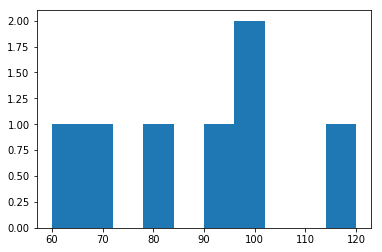

In [37]:
plt.hist(df['L'])

# Part (c)

In [28]:
import numpy as np

df['log_Q']=np.log(df['Q'])
df['log_L']=np.log(df['L'])
df['log_K']=np.log(df['K'])

df

,Country,Q,L,K,log_Q,log_L,log_K
0,B,80,60,50,4.382027,4.094345,3.912023
1,C,150,100,100,5.010635,4.605170,4.605170
2,D,135,100,80,4.905275,4.605170,4.382027
3,E,165,120,100,5.105945,4.787492,4.605170
4,F,95,70,60,4.553877,4.248495,4.094345
5,G,130,90,80,4.867534,4.499810,4.382027
6,H,110,80,70,4.700480,4.382027,4.248495


Histograms of log transformed Q & L:

(array([1., 0., 1., 0., 1., 0., 1., 1., 1., 1.]),
 array([4.38202663, 4.45441852, 4.5268104 , 4.59920229, 4.67159417,
        4.74398605, 4.81637794, 4.88876982, 4.96116171, 5.03355359,
        5.10594547]),
 <a list of 10 Patch objects>)

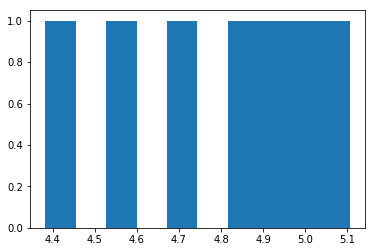

In [31]:
plt.hist(df['log_Q'])

(array([1., 0., 1., 0., 1., 1., 0., 2., 0., 1.]),
 array([4.09434456, 4.16365928, 4.232974  , 4.30228872, 4.37160343,
        4.44091815, 4.51023287, 4.57954759, 4.64886231, 4.71817702,
        4.78749174]),
 <a list of 10 Patch objects>)

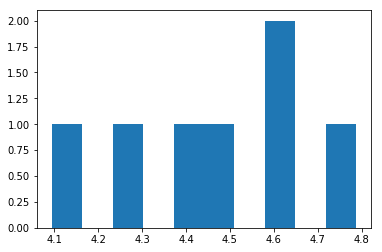

In [39]:
plt.hist(df['log_L'])

# Part (d)

By applying a logarithmic transformation to: 

Q = A

In [45]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

X = df[['log_L', 'log_K']]
Y = df['log_Q']

lm.fit(X, Y)


print('Intercept: \n', lm.intercept_)
print('Coefficients: \n', lm.coef_)

Intercept: 
 0.14623321175616955
Coefficients: 
 [0.54842747 0.50874094]


seems reasonable....

# Part (e)

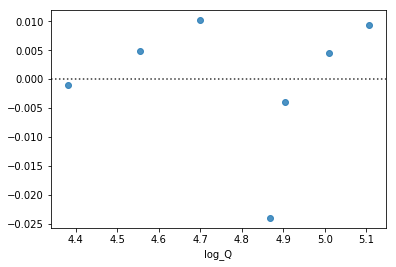

In [48]:
# Residuals - we can use the residplot function from seaborn to plot residuals:
import seaborn

fitted = lm.predict(X) # get fitted values
seaborn.residplot(Y, fitted)

# Part (f)

In [58]:
# First, we need to get the R^2 value - store as R2:

R2 = lm.score(X, Y)
print("R-squared:", R2)

# Then, use the R^2 value to calculate adjusted R^2

adj_R2 = 1 - (1-R2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adjusted R-squared:", adj_R2)

R-squared: 0.9979175612132034
Adjusted R-squared: 0.9968763418198051
